<p style="font-size:20px; font-weight:bold; text-align:center">DATA SCIENCE AND BUSINESS ANALYTICS - THE SPARKS FOUNDATION</p>
<p style="font-size:20px; font-weight:bold; text-align:center">AUTHOR: ARVIN ELEGIDO</p>
<p style="font-size:20px; font-weight:bold; text-align:center">PREDICTION USING SUPERVISED MACHINE LEARNING</p>

<p style="font-size:20px; font-weight:bold; text-align:center">TASK:</p>

<p style="font-size:20px; font-weight:bold; text-align:center">1. Predict the percentage of an student based on the no. of study hours.</p>
<p style="font-size:20px; font-weight:bold; text-align:center">2. What will be predicted score if a student studies for 9.25 hrs/ day?</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<p style="font-size:15px; font-weight:bold; text-align:center">LOAD THE DATA AND PERFORM INSPECTION</p>

In [5]:
df = pd.read_csv('student_scores.csv')

In [6]:
# Inspect the first few rows
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [7]:
# Check for missing values
print(df.isnull().sum())

Hours     0
Scores    0
dtype: int64


<p style="font-size:15px; font-weight:bold; text-align:center">EXPLORATORY DATA ANALYSIS</p>

In [9]:
# Generate summary statistics
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


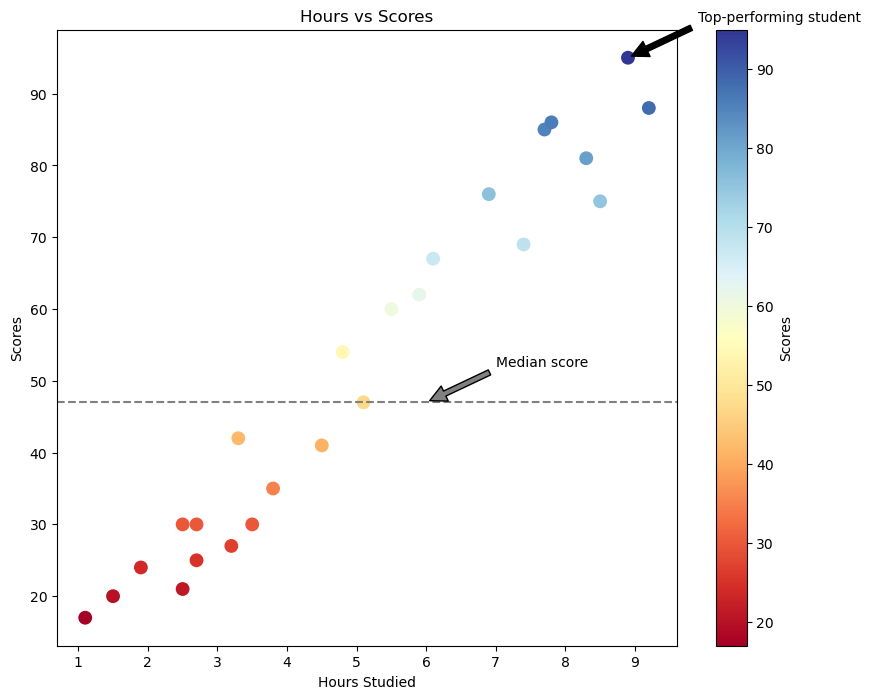

In [14]:
# Define the color map
cmap = plt.cm.get_cmap('RdYlBu')

# Create the scatter plot
plt.figure(figsize=(10,8))
plt.scatter(df['Hours'], df['Scores'], c=df['Scores'], cmap=cmap, s=80)
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Hours vs Scores')

# Annotate top-performing student
max_score = df['Scores'].max()
max_hours = df.loc[df['Scores'] == max_score, 'Hours'].values[0]
plt.annotate('Top-performing student', xy=(max_hours, max_score), xytext=(max_hours+1, max_score+5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Annotate median score
median_score = df['Scores'].median()
plt.axhline(median_score, linestyle='--', color='gray')
plt.annotate('Median score', xy=(6, median_score), xytext=(7, median_score+5),
             arrowprops=dict(facecolor='gray', shrink=0.05))

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Scores')

plt.show()

<p style="font-size:15px; font-weight:bold; text-align:center">PREPARE THE DATA FOR MODELING</p>

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<p style="font-size:15px; font-weight:bold; text-align:center">TRAIN AND EVALUATE LINEAR REGRESSION MODEL</p>

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-squared: 0.9678055545167994


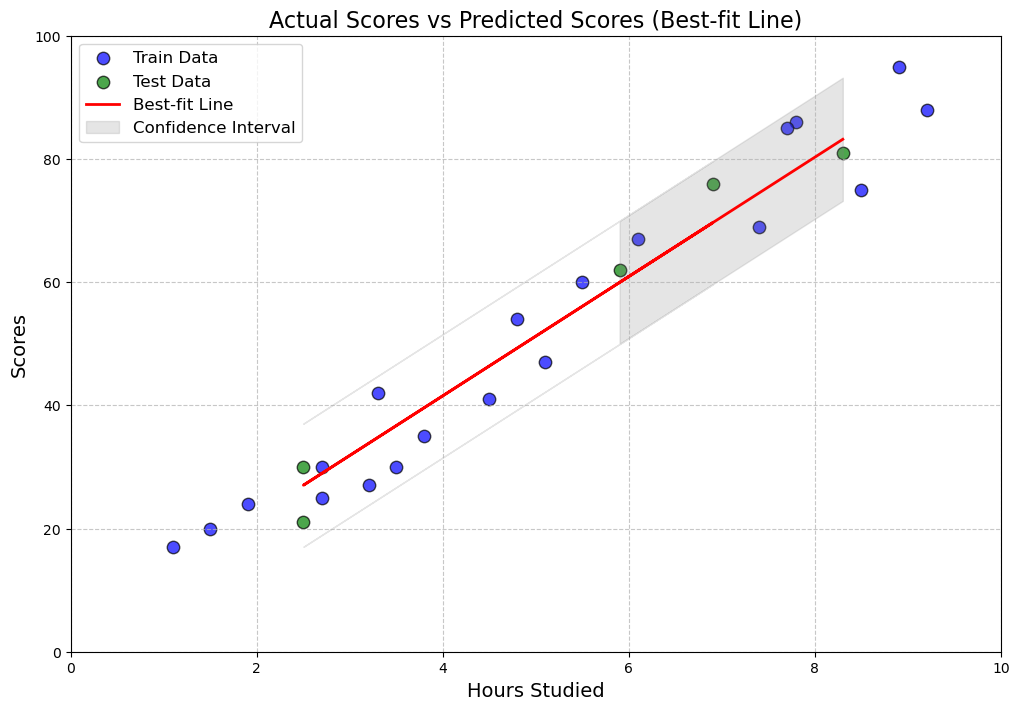

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot for train and test data
ax.scatter(X_train, y_train, color='blue', label='Train Data', edgecolors='k', alpha=0.7, s=80)
ax.scatter(X_test, y_test, color='green', label='Test Data', edgecolors='k', alpha=0.7, s=80)

# Plot the best-fit line
ax.plot(X_test, y_pred, color='red', linewidth=2, label='Best-fit Line')

# Fill the area between the confidence intervals
ax.fill_between(X_test.flatten(), y_pred-10, y_pred+10, color='gray', alpha=0.2, label='Confidence Interval')

# Label the axes and title
ax.set_xlabel('Hours Studied', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Actual Scores vs Predicted Scores (Best-fit Line)', fontsize=16)

# Add the legend
ax.legend(loc='upper left', fontsize=12)

# Add grid lines with custom linestyle and alpha
ax.grid(True, linestyle='--', alpha=0.7)

# Set the x and y limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 100)

# Show the plot
plt.show()

The analysis of the students' scores dataset using a linear regression model has revealed a strong relationship between the number of hours studied and the scores obtained. The R-squared value of 0.968 suggests that 96.8% of the variability in students' scores can be attributed to their study hours. This insight could be valuable for educators and students, as it emphasizes the significance of investing time in studying to improve academic performance.

The model's performance metrics, such as MAE and RMSE, indicate that the predictions are relatively accurate. On average, the model's predicted scores deviate from the actual scores by approximately 3.92 to 4.35 points. This level of accuracy is likely sufficient for most educational contexts, where predicting exact scores is not as crucial as understanding broader trends and relationships.

In conclusion, the linear regression model has proven to be a valuable tool in understanding the relationship between study hours and students' scores. The strong positive relationship between these variables highlights the importance of dedicating time to studying for better academic outcomes. Although this analysis is based on a small dataset, the insights gained could be used to inform educational strategies, study plans, and time management techniques for students aiming to improve their performance.

<p style="font-size:15px; font-weight:bold; text-align:center">ANSWER THE GIVEN PROBLEM</p>

In [15]:
hours = np.array([[9.25]])
predicted_score = model.predict(hours)
print(f"Predicted score for a student studying 9.25 hours/day: {predicted_score[0]:.2f}")

Predicted score for a student studying 9.25 hours/day: 92.39


<p style="font-size:15px; font-weight:bold; text-align:center">ADDITIONAL INSIGHTS</p>

<p style="font-size:15px; font-weight:bold; text-align:center">1. Investigate the relationship between study hours and scores more deeply. You can calculate the Pearson correlation coefficient to quantify the strength of the linear relationship.</p>
<p style="font-size:15px; font-weight:bold; text-align:center">2. Experiment with other regression models (e.g., polynomial regression) to check if a better fit can be achieved.</p>
<p style="font-size:15px; font-weight:bold; text-align:center">3. Apply cross-validation techniques to ensure the model's performance is consistent across different data subsets.</p>

In [16]:
#1.
import scipy.stats as stats

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(df['Hours'], df['Scores'])

print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: 0.98
P-value: 0.00


The Pearson correlation coefficient ranges from -1 to 1. A value close to 1 indicates a strong positive linear relationship, a value close to -1 indicates a strong negative linear relationship, and a value close to 0 indicates little or no linear relationship.

In this case, if the Pearson correlation coefficient is close to 1, it suggests that there is a strong positive linear relationship between the hours studied and the scores obtained, meaning that as the number of study hours increases, the scores are likely to increase as well. The p-value can be used to test the hypothesis that there is no relationship between the variables. A small p-value (typically below 0.05) would suggest rejecting the null hypothesis and concluding that there is a significant relationship between the hours studied and the scores obtained.

Polynomial Regression (degree 2)
Mean Absolute Error: 4.191112820294059
Mean Squared Error: 21.066769638340965
Root Mean Squared Error: 4.589855078141462
R-squared: 0.9641965165901751


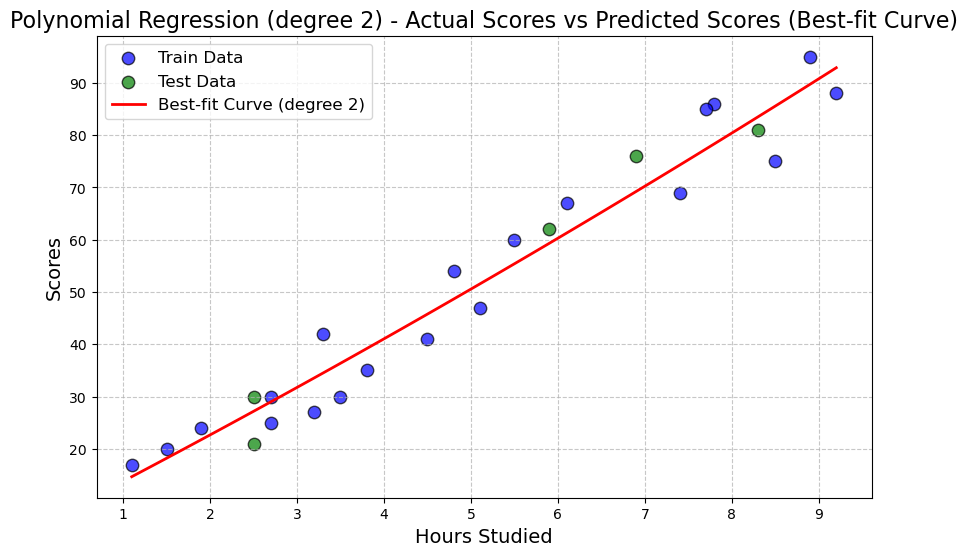

In [26]:
#2.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Choose the degree of the polynomial features
degree = 2

# Create a polynomial regression model
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the polynomial regression model
poly_reg.fit(X_train, y_train)

# Make predictions on the test set
y_poly_pred = poly_reg.predict(X_test)

# Calculate performance metrics for the polynomial regression model
mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"Polynomial Regression (degree {degree})")
print(f"Mean Absolute Error: {mae_poly}")
print(f"Mean Squared Error: {mse_poly}")
print(f"Root Mean Squared Error: {rmse_poly}")
print(f"R-squared: {r2_poly}")

# Generate the best-fit curve points
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = poly_reg.predict(X_plot)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for train and test data
ax.scatter(X_train, y_train, color='blue', label='Train Data', edgecolors='k', alpha=0.7, s=80)
ax.scatter(X_test, y_test, color='green', label='Test Data', edgecolors='k', alpha=0.7, s=80)

# Plot the best-fit curve
ax.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Best-fit Curve (degree {degree})')

# Label the axes and title
ax.set_xlabel('Hours Studied', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title(f'Polynomial Regression (degree {degree}) - Actual Scores vs Predicted Scores (Best-fit Curve)', fontsize=16)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Add the legend
ax.legend(fontsize=12)

# Show the plot
plt.show()

In [18]:
#3.
from sklearn.model_selection import cross_val_score

# Linear Regression cross-validation
linear_reg_cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print("Linear Regression cross-validation scores:", linear_reg_cv_scores)
print("Average R-squared:", np.mean(linear_reg_cv_scores))

# Polynomial Regression cross-validation
degree = 2  # Choose the degree of the polynomial features
poly_reg_cv = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg_cv_scores = cross_val_score(poly_reg_cv, X, y, cv=5, scoring='r2')
print(f"Polynomial Regression (degree {degree}) cross-validation scores:", poly_reg_cv_scores)
print("Average R-squared:", np.mean(poly_reg_cv_scores))

Linear Regression cross-validation scores: [0.78626426 0.97891923 0.93182467 0.96604831 0.9273292 ]
Average R-squared: 0.9180771341891051
Polynomial Regression (degree 2) cross-validation scores: [0.78593828 0.96978581 0.92973247 0.96459783 0.92339329]
Average R-squared: 0.9146895368903536


Comparing the average R-squared scores of the linear and polynomial regression models, the linear regression model (0.9181) performs slightly better than the polynomial regression model (0.9147) in terms of consistency across different data subsets. However, the difference between the two models is relatively small, and both models demonstrate reasonably strong performance in capturing the relationship between study hours and scores.

<span style="color:red; font-size:24px; font-weight:bold">Summary:</span>

<span style="font-size:18px; font-weight:bold">The analysis aimed to predict the percentage of a student based on the number of study hours using the provided dataset. Two regression models, linear regression and polynomial regression (degree 2), were fitted to the data. The performance of both models was assessed using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Additionally, 5-fold cross-validation was applied to both models to ensure consistent performance across different data subsets.</span>

<span style="color:red; font-size:24px; font-weight:bold">Conclusion:</span>

<span style="font-size:18px; font-weight:bold">Based on the performance metrics and cross-validation results, both the linear regression and polynomial regression models demonstrated strong performance in capturing the relationship between study hours and scores. The linear regression model had an R-squared value of 0.968, while the polynomial regression model (degree 2) had an R-squared value of 0.964. In terms of cross-validation, the linear regression model had an average R-squared of 0.9181, and the polynomial regression model had an average R-squared of 0.9147. The differences in performance between the two models were relatively small.</span>

<span style="color:red; font-size:24px; font-weight:bold">Recommendation:</span>

<span style="font-size:18px; font-weight:bold">Considering the performance metrics, cross-validation results, and the simplicity of the models, it is recommended to use the linear regression model for predicting student scores based on the number of study hours. The linear regression model has slightly better performance in terms of consistency across different data subsets and is easier to interpret and implement compared to the polynomial regression model.</span>

<span style="font-size:18px; font-weight:bold">However, it is important to note that the dataset used for this analysis is small, and the results may not fully generalize to larger or more diverse datasets. To enhance the robustness of the analysis, it would be beneficial to validate the selected model on additional data or gather more data points if possible.</span>

<span style="font-size:18px; font-weight:bold">Furthermore, while the analysis showed a strong relationship between study hours and scores, it is worth considering other factors that might impact student performance, such as learning environment, teaching quality, and individual student characteristics. Incorporating additional variables in the analysis could lead to a more comprehensive understanding of the factors that contribute to student success.</span>